<a href="https://colab.research.google.com/github/AjeetSingh02/Notebooks/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [0]:
import pandas as pd
import numpy as np

<h1>PCA for Data Visualization</h1>

**1. Load Dataset**

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [0]:
df.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**2. Standardize the Data**
<br>
PCA is effected by scale so you need to scale the features in your data before applying PCA.
<br>
<a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py">Importance of Feature Scaling</a>

In [0]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [0]:
x = pd.DataFrame(x, columns=features)

In [0]:
x.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [0]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [0]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [0]:
finalDf.target.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: target, dtype: int64

**Visualize 2D Projection**

In [0]:
import matplotlib.pyplot as plt

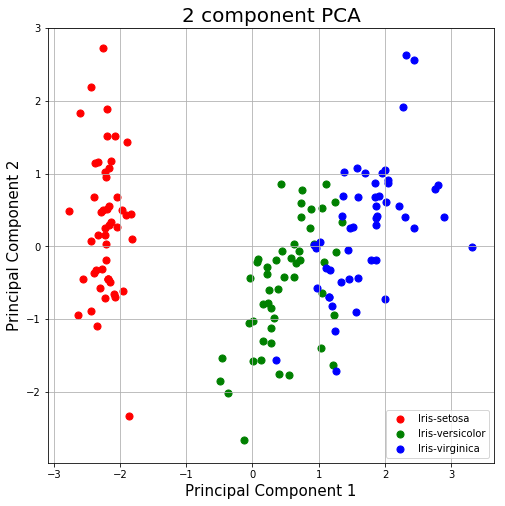

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [0]:
np.sum(pca.explained_variance_ratio_)

0.9580097536148197

**We lost some information here**

<h1>PCA to Speed-up Machine Learning Algorithms</h1>

**Download and Load the Data**

The MNIST database of handwritten digits.784 feature columns

In [0]:
data = pd.read_csv("/content/sample_data/mnist_test.csv")

In [0]:
target = data["7"]

In [0]:
target.value_counts()

1    1135
2    1032
7    1027
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: 7, dtype: int64

In [0]:
data.drop(columns=["7"], inplace=True)

In [0]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Train Test Split**

In [0]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(data, target, test_size=1/7.0, random_state=0)

In [0]:
train_img.shape

(8570, 784)

In [0]:
test_img.shape

(1429, 784)

In [0]:
train_lbl.shape

(8570,)

In [0]:
test_lbl.shape

(1429,)

**Standardizing**

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

**Import and Apply PCA**

Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [0]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [0]:
#Fit PCA on training set
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
np.sum(pca.explained_variance_ratio_)

0.950297574035637

In [0]:
pca.n_components_

275

**Apply the mapping (transform) to both the training set and the test set.**

In [0]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

**Apply Logistic Regression to the Transformed Data**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [0]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array([7])

In [0]:
logisticRegr.predict(test_img[0:10])

array([7, 8, 7, 2, 7, 7, 2, 7, 7, 7])

In [0]:
logisticRegr.score(test_img, test_lbl)

0.9118264520643807

In [0]:
train_img, test_img, train_lbl, test_lbl = train_test_split(data, target, test_size=1/7.0, random_state=0)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def give_PCA(df, N):
  #applying scaling
  scaler = StandardScaler()
  scaler.fit(df)

  # Apply transform
  df = scaler.transform(df)

  # Make an instance of the Model
  pca = PCA(n_components = N)

  #Fit PCA
  pca.fit(df)

  df = pd.DataFrame(pca.transform(df))

  variance_ratio = pca.explained_variance_ratio_

  return df, variance_ratio, sum(variance_ratio)

In [0]:
from sklearn.decomposition import TruncatedSVD

def give_SVD(df, N):
  svd = TruncatedSVD(n_components=N, n_iter=7, random_state=42)
  svd.fit(df) 
  df = pd.DataFrame(svd.transform(df))
  variance_ratio = pca.explained_variance_ratio_

  return df, variance_ratio, svd.explained_variance_ratio_.sum()


In [0]:
df, var_rat, sum_ratio = give_SVD(data, 5)
sum_ratio

0.33523448179105453

In [0]:
data = pd.read_csv("/content/sample_data/mnist_test.csv")
data.drop(columns=["7"], inplace=True)

In [0]:
data.shape

(9999, 784)

In [0]:
ret_df, var_ratio, sum_var = give_PCA(data,2)

In [0]:
ret_df.shape

(9999, 2)

In [0]:
ret_df.head()

,0,1
0,2.936771,-8.714204
1,-7.292699,-4.170529
2,8.796937,0.176593
3,-0.102394,6.273007
4,-8.087863,-4.395110


In [0]:
var_ratio

array([0.0619968 , 0.04261748])

In [0]:
sum_var

0.10461427815692192

In [0]:
sum_var_list = []
for i in range(0, data.shape[1]-1, 10):
  ret_df, var_ratio, sum_var = give_SVD(data, i)
  sum_var_list.append(sum_var)

In [0]:
import matplotlib.pyplot as plt

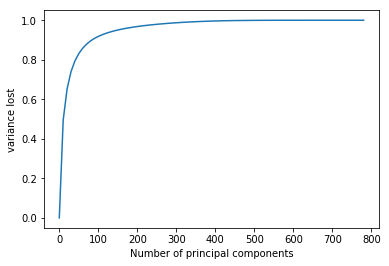

In [0]:
plt.plot([i for i in range(0, data.shape[1]-1, 10)], sum_var_list)
plt.xlabel("Number of principal components")
_ = plt.ylabel("variance lost")

In [0]:
dd = pd.DataFrame({"a":["1","two","3","4"], "b":["three","5","6","7"]})

In [0]:
give_PCA(dd, 2)

ValueError: ignored